# Loan Assesment Logistic Regressions

In [1]:
import pandas as pd
import numpy as np
import math
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Get the Loan History Data

In [2]:
ls

1564688933_LoansTrainingSet.csv
1564688942_LoansTraining data dictionary.docx
HackDay#1.ipynb
README.md
Untitled.ipynb
znotebook/


In [3]:
df = pd.read_csv('1564688933_LoansTrainingSet.csv')

### Show basic information of the Loan History Data

In [4]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,NaN,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.0,10+ years,Own Home,38072.0,Debt Consolidation,$751.92,26.2,NaN,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,$355.18,11.5,NaN,12,0,17391,37081,0.0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 19 columns):
Loan ID                         256984 non-null object
Customer ID                     256984 non-null object
Loan Status                     256984 non-null object
Current Loan Amount             256984 non-null int64
Term                            256984 non-null object
Credit Score                    195308 non-null float64
Years in current job            245508 non-null object
Home Ownership                  256984 non-null object
Annual Income                   195308 non-null float64
Purpose                         256984 non-null object
Monthly Debt                    256984 non-null object
Years of Credit History         256984 non-null float64
Months since last delinquent    116601 non-null float64
Number of Open Accounts         256984 non-null int64
Number of Credit Problems       256984 non-null int64
Current Credit Balance          256984 non-null int64
Maximum O

In [6]:
df.isnull().sum()

Loan ID                              0
Customer ID                          0
Loan Status                          0
Current Loan Amount                  0
Term                                 0
Credit Score                     61676
Years in current job             11476
Home Ownership                       0
Annual Income                    61676
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    140383
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                       529
Tax Liens                           23
dtype: int64

In [7]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
count,2.569840e+05,195308.000000,1.953080e+05,256984.000000,116601.000000,256984.000000,256984.000000,2.569840e+05,256455.000000,256961.000000
mean,1.371331e+07,1251.116099,7.195272e+04,18.290195,34.881450,11.106267,0.156628,1.540656e+04,0.110316,0.027203
std,3.438131e+07,1762.016848,5.887757e+04,7.075747,21.854165,4.982982,0.460731,1.966506e+04,0.336229,0.245950
min,5.050000e+02,585.000000,0.000000e+00,3.400000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,8.299000e+03,714.000000,4.432100e+04,13.500000,16.000000,8.000000,0.000000,5.974000e+03,0.000000,0.000000
50%,1.429800e+04,733.000000,6.124200e+04,17.000000,32.000000,10.000000,0.000000,1.107800e+04,0.000000,0.000000
75%,2.436700e+04,744.000000,8.646200e+04,21.700000,51.000000,14.000000,0.000000,1.931900e+04,0.000000,0.000000
max,1.000000e+08,7510.000000,8.713547e+06,70.500000,176.000000,76.000000,11.000000,1.731412e+06,7.000000,11.000000


### Visualize the Raw numerical attributes as histograms

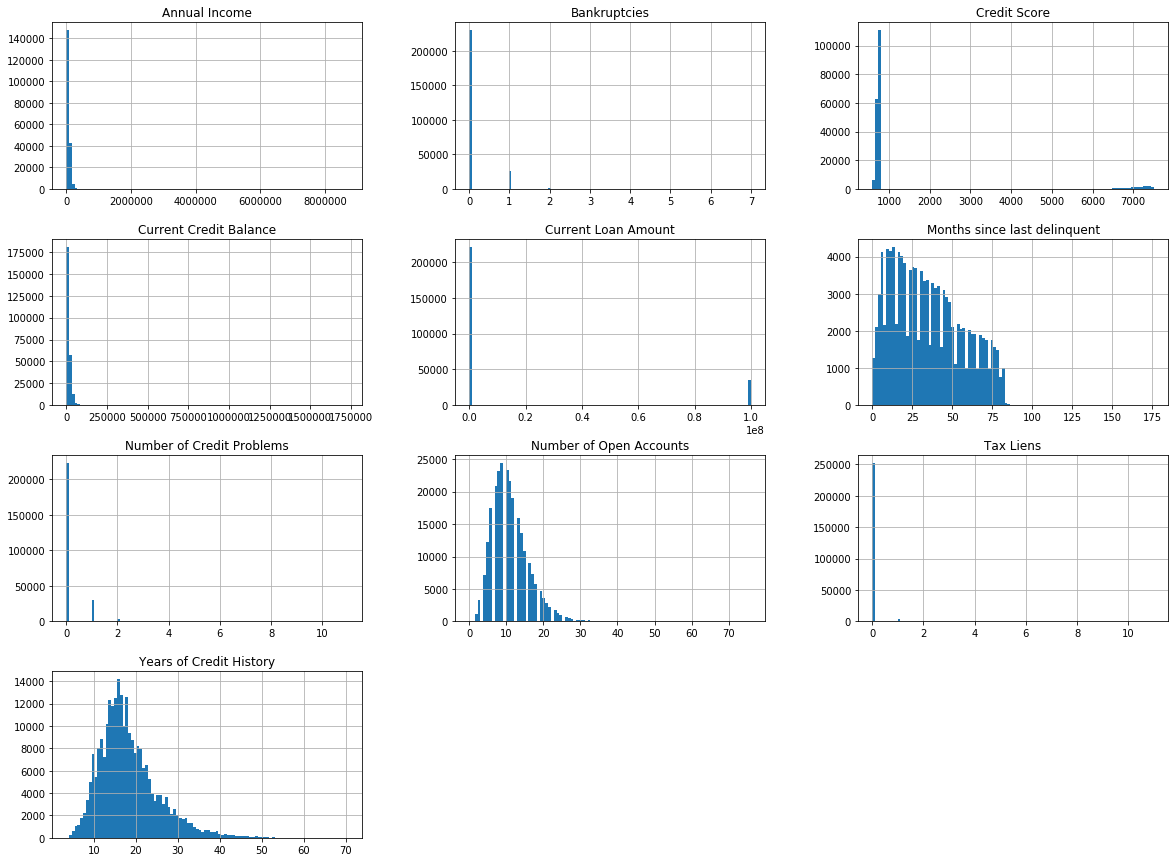

In [8]:
%matplotlib inline

df.hist(bins=100, figsize=(20,15))
plt.show()

In [9]:
df.corr()

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
Current Loan Amount,1.000000,-0.139743,0.024069,0.014725,0.003488,-0.003094,-0.000062,0.003138,0.003576,-0.003069
Credit Score,-0.139743,1.000000,-0.033221,-0.011658,-0.007994,0.008124,0.000777,-0.003263,-0.003426,0.004381
Annual Income,0.024069,-0.033221,1.000000,0.146859,-0.059675,0.140463,-0.013672,0.292165,-0.044837,0.038185
Years of Credit History,0.014725,-0.011658,0.146859,1.000000,-0.039695,0.128033,0.061251,0.201001,0.062049,0.020915
Months since last delinquent,0.003488,-0.007994,-0.059675,-0.039695,1.000000,-0.035803,0.088612,-0.024292,0.112907,0.002730
Number of Open Accounts,-0.003094,0.008124,0.140463,0.128033,-0.035803,1.000000,-0.013731,0.222763,-0.022805,0.005754
Number of Credit Problems,-0.000062,0.000777,-0.013672,0.061251,0.088612,-0.013731,1.000000,-0.103814,0.755866,0.584917
Current Credit Balance,0.003138,-0.003263,0.292165,0.201001,-0.024292,0.222763,-0.103814,1.000000,-0.117995,-0.011118
Bankruptcies,0.003576,-0.003426,-0.044837,0.062049,0.112907,-0.022805,0.755866,-0.117995,1.000000,0.046160
Tax Liens,-0.003069,0.004381,0.038185,0.020915,0.002730,0.005754,0.584917,-0.011118,0.046160,1.000000


In [10]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,NaN,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.0,10+ years,Own Home,38072.0,Debt Consolidation,$751.92,26.2,NaN,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,$355.18,11.5,NaN,12,0,17391,37081,0.0,0.0


### Clean up the data

In [11]:
df['Fully_Paid'] = pd.get_dummies(df['Loan Status'],drop_first=True)
df = df.drop('Loan Status',axis=1)

In [12]:
abs(df.corr()['Fully_Paid']).sort_values(ascending=False)

Fully_Paid                      1.000000
Credit Score                    0.440307
Current Loan Amount             0.269804
Annual Income                   0.070328
Years of Credit History         0.035548
Months since last delinquent    0.023541
Number of Open Accounts         0.020787
Tax Liens                       0.012585
Number of Credit Problems       0.010179
Current Credit Balance          0.008838
Bankruptcies                    0.001154
Name: Fully_Paid, dtype: float64

In [13]:
df.isnull().sum()

Loan ID                              0
Customer ID                          0
Current Loan Amount                  0
Term                                 0
Credit Score                     61676
Years in current job             11476
Home Ownership                       0
Annual Income                    61676
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    140383
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                       529
Tax Liens                           23
Fully_Paid                           0
dtype: int64

In [14]:
def FixHighCreditScore():
    a = df['Credit Score'].values.tolist()
    b=[]
    for i in range(len(a)):
        if math.isnan(a[i]) == True:
            b.append(a[i])
        elif a[i] > 850:
            b.append(a[i]/10)
        else:
            b.append(a[i])
    if len(a) == len(b):
        print("passed")
    
    return b

In [15]:
df['Parsed_CreditScore'] = pd.DataFrame(FixHighCreditScore())

passed


In [16]:
df = df.drop('Credit Score',axis=1)

In [17]:
def ParseYearsInCurrentJobData():
    a = df['Years in current job'].values.tolist()
    b = []
    for i in range(len(a)):
        if type(a[i]) == str:    
            if(len(df['Years in current job'][i].split()) == 3):
                b.append(0)
            elif(len(df['Years in current job'][i].split()) == 2):
                if(df['Years in current job'][i].split()[0] == '10+'):
                    b.append(10)
                else:
                    b.append(int(df['Years in current job'][i].split()[0]))           
            else:
                b.append(a[i])
                print(a[i])
        else:
            b.append(a[i])
            
    if len(a) == len(b):
        print("passed")
        
    return b

In [18]:
df['Parsed_YearsInCurrentJob'] = pd.DataFrame(ParseYearsInCurrentJobData())
df = df.drop("Years in current job",axis=1)

passed


In [19]:
df['Parsed_MonthlyDebt'] = pd.DataFrame([float(df['Monthly Debt'][i].replace(',','').replace('$','').replace(' ','')) for i in range(len(df['Monthly Debt']))])
df = df.drop(['Monthly Debt'], axis=1)

In [20]:
def ParseMaxOpenCredit():
    a = df['Maximum Open Credit'].values.tolist()
    b = []
    for i in range(len(a)):
        if type(a[i]) == str:  
            if('#' not in a[i]):
                b.append(float(a[i]))
            else:
                b.append(float('NaN'))
        else:
            b.append(a[i])
            
    if len(a) == len(b):
        print("passed")
        
    return b

In [21]:
df['Parsed_MaxOpenCredit'] = pd.DataFrame(ParseMaxOpenCredit())

passed


In [22]:
df = df.drop(['Customer ID','Loan ID', 'Months since last delinquent'],axis=1)

In [23]:
outliers = df.quantile(.97)
df = df[(df['Parsed_MonthlyDebt']<outliers['Parsed_MonthlyDebt'])]
df = df[(df['Annual Income']<outliers['Annual Income'])]
df = df[(df['Parsed_CreditScore']<outliers['Parsed_CreditScore'])]
df = df[(df['Current Credit Balance']<outliers['Current Credit Balance'])]
df = df[(df['Parsed_MaxOpenCredit']<outliers['Parsed_MaxOpenCredit'])]


In [24]:
df['Parsed_MaxOpenCredit'] = df['Parsed_MaxOpenCredit'].fillna(df['Parsed_MaxOpenCredit'].median())
df['Parsed_CreditScore'] = df['Parsed_CreditScore'].fillna(df['Parsed_CreditScore'].median())
df['Parsed_YearsInCurrentJob'] = df['Parsed_YearsInCurrentJob'].fillna(df['Parsed_YearsInCurrentJob'].median())
df['Annual Income'] = df['Annual Income'].fillna(df['Annual Income'].median())
df['Bankruptcies'] = df['Bankruptcies'].fillna(df['Bankruptcies'].median())
df['Tax Liens'] = df['Tax Liens'].fillna(df['Tax Liens'].median())

## Visualize Numeric data after cleanup

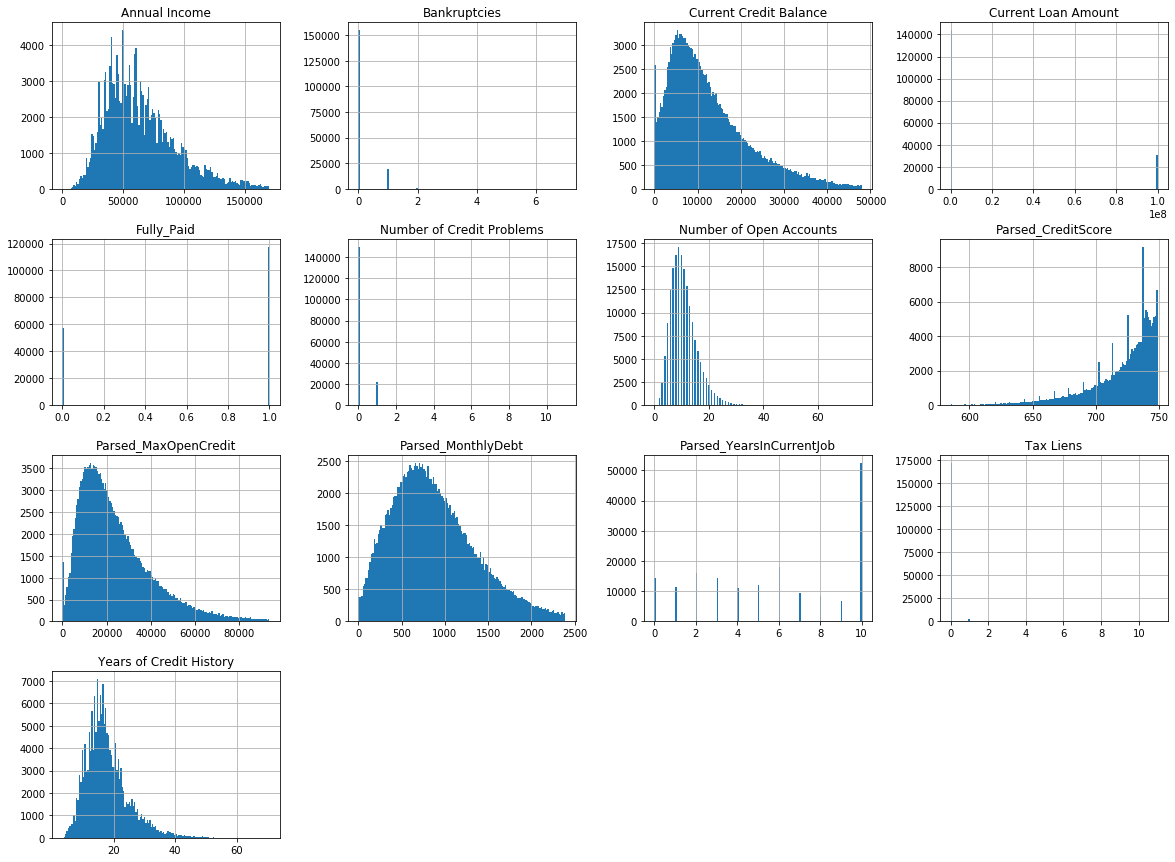

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=150, figsize=(20,15))
plt.show()

## Parsing Categorical Variables 

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174680 entries, 0 to 256982
Data columns (total 17 columns):
Current Loan Amount          174680 non-null int64
Term                         174680 non-null object
Home Ownership               174680 non-null object
Annual Income                174680 non-null float64
Purpose                      174680 non-null object
Years of Credit History      174680 non-null float64
Number of Open Accounts      174680 non-null int64
Number of Credit Problems    174680 non-null int64
Current Credit Balance       174680 non-null int64
Maximum Open Credit          174680 non-null object
Bankruptcies                 174680 non-null float64
Tax Liens                    174680 non-null float64
Fully_Paid                   174680 non-null uint8
Parsed_CreditScore           174680 non-null float64
Parsed_YearsInCurrentJob     174680 non-null float64
Parsed_MonthlyDebt           174680 non-null float64
Parsed_MaxOpenCredit         174680 non-null float64
dt

In [27]:
df.head()

,Current Loan Amount,Term,Home Ownership,Annual Income,Purpose,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Fully_Paid,Parsed_CreditScore,Parsed_YearsInCurrentJob,Parsed_MonthlyDebt,Parsed_MaxOpenCredit
0,11520,Short Term,Home Mortgage,33694.0,Debt Consolidation,12.3,10,0,6760,16056,0.0,0.0,1,741.0,10.0,584.03,16056.0
1,3441,Short Term,Home Mortgage,42269.0,other,26.3,17,0,6262,19149,0.0,0.0,1,734.0,4.0,1106.04,19149.0
2,21029,Short Term,Home Mortgage,90126.0,Debt Consolidation,28.8,5,0,20967,28335,0.0,0.0,1,747.0,10.0,1321.85,28335.0
3,18743,Short Term,Own Home,38072.0,Debt Consolidation,26.2,9,0,22529,43915,0.0,0.0,1,747.0,10.0,751.92,43915.0
4,11731,Short Term,Rent,50025.0,Debt Consolidation,11.5,12,0,17391,37081,0.0,0.0,1,746.0,4.0,355.18,37081.0


In [28]:
Term = pd.get_dummies(df['Term'], drop_first = True)
df = df.drop('Term',axis=1)

In [29]:
Home_Ownership = pd.get_dummies(df['Home Ownership'], drop_first = True)
Home_Ownership.head()
df = df.drop('Home Ownership',axis=1)

In [30]:
Purpose = pd.get_dummies(df['Purpose'], drop_first = True)
Purpose.head()
df = df.drop('Purpose', axis=1)

In [31]:
df = pd.concat([df, Term, Home_Ownership, Purpose],axis=1)

In [32]:
df.isnull().sum()

Current Loan Amount          0
Annual Income                0
Years of Credit History      0
Number of Open Accounts      0
Number of Credit Problems    0
Current Credit Balance       0
Maximum Open Credit          0
Bankruptcies                 0
Tax Liens                    0
Fully_Paid                   0
Parsed_CreditScore           0
Parsed_YearsInCurrentJob     0
Parsed_MonthlyDebt           0
Parsed_MaxOpenCredit         0
Short Term                   0
Home Mortgage                0
Own Home                     0
Rent                         0
Buy House                    0
Buy a Car                    0
Debt Consolidation           0
Educational Expenses         0
Home Improvements            0
Medical Bills                0
Other                        0
Take a Trip                  0
other                        0
dtype: int64

In [33]:
df.head()

,Current Loan Amount,Annual Income,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Fully_Paid,...,Rent,Buy House,Buy a Car,Debt Consolidation,Educational Expenses,Home Improvements,Medical Bills,Other,Take a Trip,other
0,11520,33694.0,12.3,10,0,6760,16056,0.0,0.0,1,...,0,0,0,1,0,0,0,0,0,0
1,3441,42269.0,26.3,17,0,6262,19149,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,1
2,21029,90126.0,28.8,5,0,20967,28335,0.0,0.0,1,...,0,0,0,1,0,0,0,0,0,0
3,18743,38072.0,26.2,9,0,22529,43915,0.0,0.0,1,...,0,0,0,1,0,0,0,0,0,0
4,11731,50025.0,11.5,12,0,17391,37081,0.0,0.0,1,...,1,0,0,1,0,0,0,0,0,0


## Combine the Numeric and Categorical Data

In [34]:
abs(df.corr()['Fully_Paid']).sort_values(ascending=False)

Fully_Paid                   1.000000
Current Loan Amount          0.322861
Parsed_CreditScore           0.255987
Short Term                   0.176544
Annual Income                0.101317
Home Mortgage                0.058223
Rent                         0.054331
Parsed_MaxOpenCredit         0.047881
Parsed_MonthlyDebt           0.029985
Number of Open Accounts      0.028878
Years of Credit History      0.023908
Buy a Car                    0.022178
Current Credit Balance       0.018584
other                        0.016971
Home Improvements            0.016304
Other                        0.013301
Bankruptcies                 0.010150
Tax Liens                    0.008950
Own Home                     0.007842
Medical Bills                0.004154
Parsed_YearsInCurrentJob     0.002817
Debt Consolidation           0.002218
Buy House                    0.002212
Educational Expenses         0.002075
Number of Credit Problems    0.000639
Take a Trip                  0.000306
Name: Fully_

In [35]:
df = df[['Fully_Paid', 'Current Loan Amount','Parsed_CreditScore','Short Term', 'Annual Income', 'Home Mortgage', 'Rent', 'Parsed_MaxOpenCredit', 'Number of Open Accounts', 'Parsed_MonthlyDebt', 'Years of Credit History', 'Buy a Car', 'Current Credit Balance', 'other']]

## Feature Engineering

In [37]:
df['Annual Income'] = df['Annual Income'].replace(0,1)
df['IncomeRatio'] = df['Parsed_MonthlyDebt']/df['Annual Income']/12.0

In [38]:
df = df.drop(['Annual Income', 'Parsed_MonthlyDebt'], axis = 1)

In [39]:
df = df.drop_duplicates()

In [43]:
abs(df.corr()['Fully_Paid']).sort_values(ascending=False)

Fully_Paid                 1.000000
Current Loan Amount        0.276211
Parsed_CreditScore         0.237396
Short Term                 0.162985
IncomeRatio                0.122706
Home Mortgage              0.052296
Rent                       0.048601
Parsed_MaxOpenCredit       0.043579
Number of Open Accounts    0.026436
Years of Credit History    0.022210
Buy a Car                  0.018391
Current Credit Balance     0.015573
other                      0.015305
Name: Fully_Paid, dtype: float64

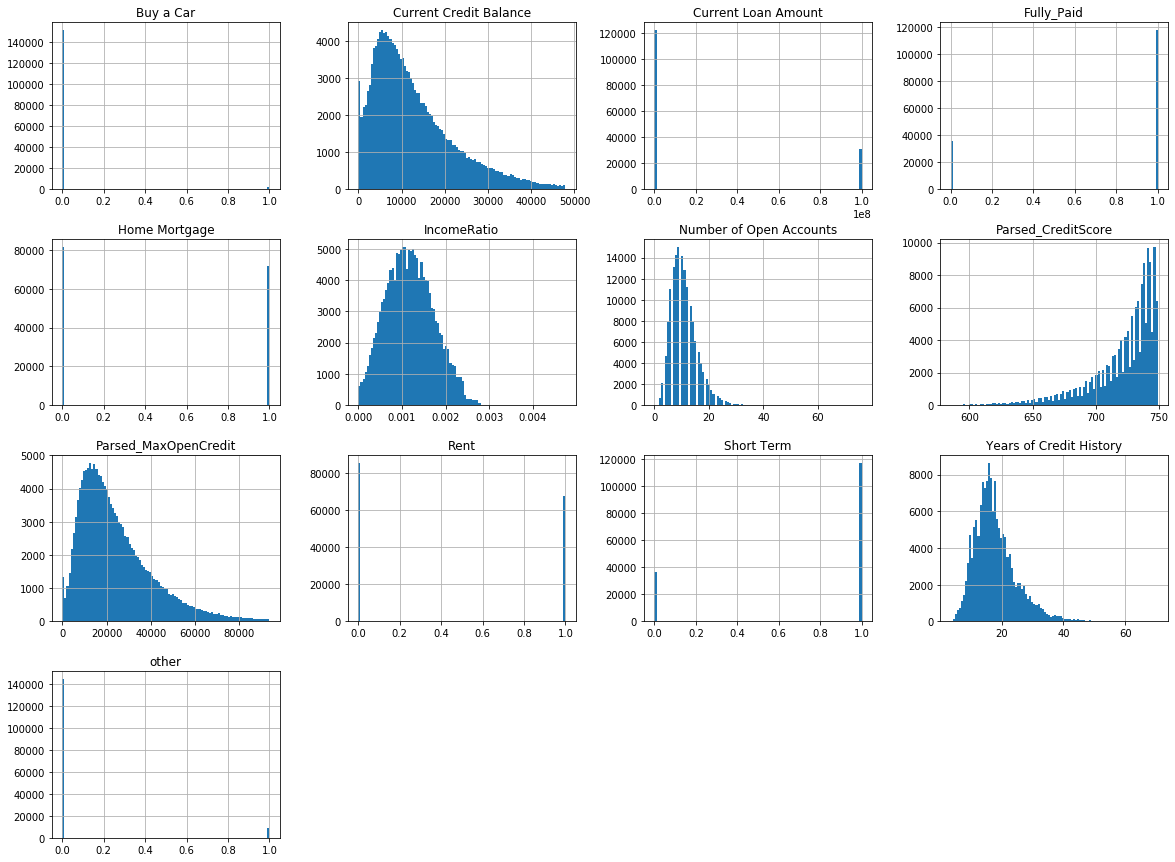

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=100, figsize=(20,15))
plt.show()

## Regression Tests

In [40]:
def algo_test(dataset, y_name):
    
    g = GaussianNB()
    b = BernoulliNB()
    k = KNeighborsClassifier()
    log = LogisticRegression()
    gbc = GradientBoostingClassifier()
    d = DecisionTreeClassifier()
    r = RandomForestClassifier()
    
    x = dataset.drop(y_name,axis = 1) 
    y = dataset[y_name]
    
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.1,random_state=13)
    
    algos = [g,b,k,log,d,r,gbc]
    algo_names = ['GaussianNB', 'BernoulliNB', 'K Nearest', 'Logistic','Single Tree','Random Forest','Gradient Boost']
    
    accuracy = []
    precision = []
    recall = []
    f1 = []
    
    result = pd.DataFrame(columns = ['Accuracy', 'Precision', 'Recall', 'F1'], index = algo_names)
    
    #result.index.name = 'Algorithms'
    
    for algo in algos:
        algo.fit(x_train,y_train)
        algo.predict(x_test)
        
        accuracy.append(accuracy_score(y_test, algo.predict(x_test)))
        precision.append(precision_score(y_test, algo.predict(x_test)))
        recall.append(recall_score(y_test, algo.predict(x_test)))
        f1.append(f1_score(y_test, algo.predict(x_test)))
    
    result.Accuracy = accuracy
    result.Precision = precision
    result.Recall = recall
    result.F1 = f1
    
    return result.sort_values('F1', ascending=False)

In [41]:
algo_test(df,'Fully_Paid')

,Accuracy,Precision,Recall,F1
BernoulliNB,0.771074,0.771074,1.000000,0.870742
Logistic,0.771074,0.771074,1.000000,0.870742
Gradient Boost,0.778387,0.795782,0.958591,0.869632
Random Forest,0.753640,0.819650,0.872470,0.845236
K Nearest,0.734705,0.787528,0.898298,0.839274
Single Tree,0.703559,0.812645,0.799983,0.806264
GaussianNB,0.437349,1.000000,0.270302,0.425572
